# Star Wars Survey Analysis
The team at [FiveThirtyEight](http://fivethirtyeight.com/) created a survey to answer 'does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?'

The 835 responses can be download from their [GitHub](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

## Import Data

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

Data summary:
- RespondentID — An anonymized ID for the respondent (person taking the survey)
- Gender — the respondent's gender
- Age — the respondent's age
- Household Income — the respondent's income
- Education — the respondent's education level
- Location (Census Region) — the respondent's location
- Have you seen any of the 6 films in the Star Wars franchise? — a Yes or No response
- Do you consider yourself to be a fan of the Star Wars film franchise? — a Yes or No response


In [26]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [27]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## Data Cleaning
- Change yes/no responses to boolean for ease of data analysis
- Change movie name responses to be boolean
- Rename columns to correspond to movie title

In [28]:
yes_no = {'Yes':True,
         'No':False}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [29]:
movie_seen = {'Star Wars: Episode I  The Phantom Menace': True,
              'Star Wars: Episode II  Attack of the Clones': True,
              'Star Wars: Episode III  Revenge of the Sith': True,
              'Star Wars: Episode IV  A New Hope': True,
              'Star Wars: Episode V The Empire Strikes Back': True,
              'Star Wars: Episode VI Return of the Jedi': True,
              True:True,
              np.NaN: False}

column_names = star_wars.columns[3:9]

for col in column_names:
    star_wars[col] = star_wars[col].map(movie_seen)

In [30]:
movie_rename = {'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
              'Unnamed: 4': 'seen_2',
              'Unnamed: 5': 'seen_3',
              'Unnamed: 6': 'seen_4',
              'Unnamed: 7': 'seen_5',
              'Unnamed: 8': 'seen_6'}

star_wars = star_wars.rename(columns=movie_rename)


In [31]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [32]:
movie_rename = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
              'Unnamed: 10': 'ranking_2',
              'Unnamed: 11': 'ranking_3',
              'Unnamed: 12': 'ranking_4',
              'Unnamed: 13': 'ranking_5',
              'Unnamed: 14': 'ranking_6'}

star_wars = star_wars.rename(columns=movie_rename)

The data is cleaned ready for analysis.

In [33]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
   

## Data Analysis
### Highest Rated Movie

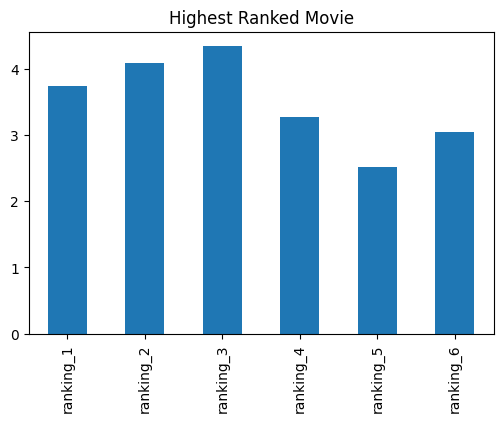

In [34]:
%matplotlib inline
star_wars[star_wars.columns[9:15]].mean().plot.bar(title='Highest Ranked Movie')

Given that the lower the ranking the better, the 5th film got the best ranking.

## Most Watched Movie

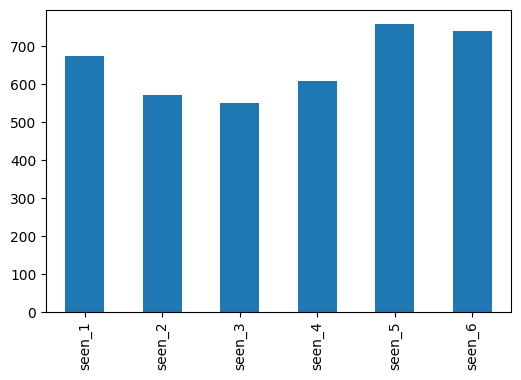

In [35]:
star_wars[star_wars.columns[3:9]].sum().plot.bar()

The graph above shows that episode V 'The Empire Strikes Back' is the most watched episode, while, after the release of episode I 'The Phantom Menace', the number of views for episodes 2 and 3 -reasonably- lowered.

In [36]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

## Do results differ if you consider yourself a Star Wars fan?
Next, we'll repeat the analysis on the most ranked and viewed Star Wars film, separating the results into two groups: Star Wars fans and regular people.

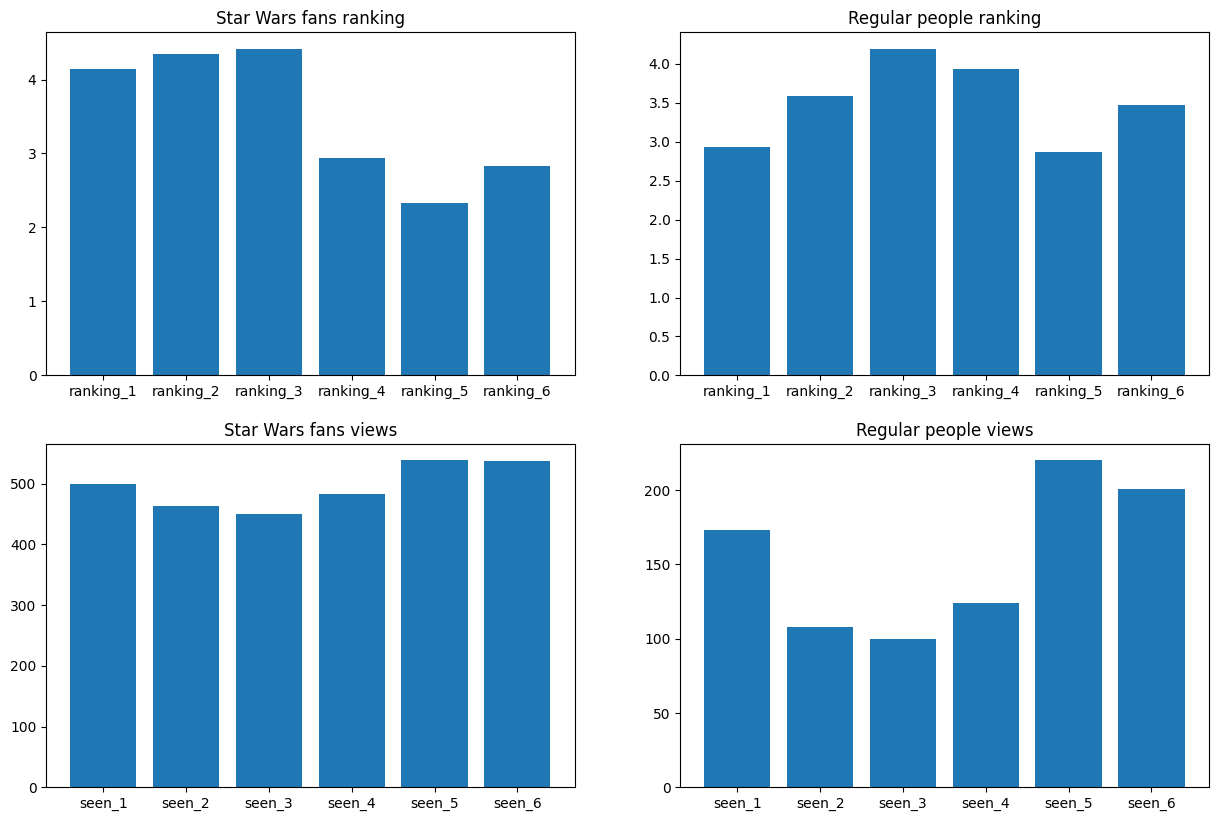

In [37]:
geeks = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
regulars = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == False]

### Ranking results

# Star Wars fans - Calculating the mean ranking for each film
geeks_means = geeks[geeks.columns[9:15]].mean()

# Star Wars fans - Preparing and plotting the results
geeks_means = geeks_means.reset_index()
geeks_means.columns = ['rank_nbr', 'mean']

# Regular people - Calculating the mean ranking for each film
regulars_means = regulars[regulars.columns[9:15]].mean()

# Regular people - Preparing and plotting the results
regulars_means = regulars_means.reset_index()
regulars_means.columns = ['rank_nbr', 'mean']


### Views results

# Star Wars fans - Calculating the number of views per film
geeks_watched = geeks[geeks.columns[3:9]].sum()

# Star Wars fans - Preparing and plotting the results
geeks_watched = geeks_watched.reset_index()
geeks_watched.columns = ['seen', '#views']

# Regular people - Calculating the number of views per film
regulars_watched = regulars[regulars.columns[3:9]].sum()

# Regular people - Preparing and plotting the results
regulars_watched = regulars_watched.reset_index()
regulars_watched.columns = ['seen', '#views']



### Plotting everything in a grid

plt.rcParams["figure.figsize"] = [15, 10]

fig, axs = plt.subplots(2, 2)

axs[0, 0].bar(x=geeks_means['rank_nbr'], height=geeks_means['mean'])
axs[0, 0].set_title('Star Wars fans ranking')

axs[0, 1].bar(x=regulars_means['rank_nbr'], height=regulars_means['mean'])
axs[0, 1].set_title('Regular people ranking')

axs[1, 0].bar(x=geeks_watched['seen'], height=geeks_watched['#views'])
axs[1, 0].set_title('Star Wars fans views')

axs[1, 1].bar(x=regulars_watched['seen'], height=regulars_watched['#views'])
axs[1, 1].set_title('Regular people views')

plt.show()

The grid above shows that 'Episode V The Empire Strikes Back' is the best rated Star Wars film for both fans and regular people. However, regular people -incredibly- rank 'Episode I The Phantom Menace' almost as high as Episode V, while fans clearly dislike this movie. Furthermore, both groups agree that the great transformation that finally occurs from Anakin Skywalker to Darth Vader in 'Episode III Revenge of the Sith' is the worst ranked.

# Conclussion
The present project has shown different interesting conclussions from the data we've just analyzed:

- The question that the team at FiveThirtyEight became interested in answering "does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?" resolves with a clear YES. Everyone agrees that this is the best Star Wars movie - and the most viewed.
- The worst ranked and least viewed movie is the third episode, "Revenge of the Sith".
- Star Wars fans and regular people distribute their number of views between films with a similar shape. However, Star Wars fans have a higher number of absolute views per film.

Further analyses could continue exploring other columns from the data, or increase the sample by including responses referring to the newest and controversial trilogy (episodes VII to IX).